In [ ]:
!ls Data

In [1]:
cd ../..

/Users/eddielin/Documents/Flatiron/Projects/Microsoft_movies_project/microsoft_movies


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#import the four relevent schemas to the budget and genres
tndb_df = pd.read_csv('Data/tn.movie_budgets.csv')
tn_mov_df = pd.read_csv('Data/tmdb.movies.csv')
akas_df = pd.read_csv('Data/imdb.title.akas.csv')
basics_df = pd.read_csv('Data/imdb.title.basics.csv')
#basics_df.head(1)
#tn_mov_df.shape
#tndb_df.info()

In [4]:
#basics_df.loc[basics_df['primary_title'].str.contains("Avat"),'primary_title']
#basics_df.groupby(basics_df['primary_title'])

In [5]:
#display(tn_mov_df.shape)
#tn_mov_df['popularity'].unique
#no idea what how they measure popularity so this data will not be used

In [6]:
#removed all punctuations to movie titles on the two schemas
tndb_df["Mov_name"] = tndb_df['movie'].str.lower().str.replace('[ \'\:\,\.]','').astype(str)
tn_mov_df["Mov_name"] = tn_mov_df['title'].str.lower().str.replace('[ \'\:\,\.]','').astype(str)
tn_mov_df['release_year'] = tn_mov_df['release_date'].astype(str).str[:4]


#tn_mov_df
#display(basics_df.head(1))
#display(akas_df.head(1))

In [7]:
#merged the two schemas with constant id
#rt_df = info_df.merge(reviews_df, on='id')

imdb_df = basics_df.merge(akas_df,left_on ='tconst',right_on = "title_id",how = "inner") 

#merged tn and tndb to create new db, keeping values only the same movie names 
tn_df = tn_mov_df.merge(tndb_df, on = 'Mov_name', how = 'inner')

In [ ]:
#imdb_df

In [8]:
display(imdb_df.head(1))
tn_df.head(1)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,1,Sangharsh,IN,hi,NaN,alternative transliteration,0.0


,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,Mov_name,release_year,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,howtotrainyourdragon,2010,30,"Mar 26, 2010",How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992"


In [9]:
#created new column with movie names stripped
imdb_df['Mov_name'] = imdb_df['primary_title'].str.lower().str.replace('[ \'\:\,\.]','').astype(str)

imdb_df.head(1)
tn_df.head(1)

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,Mov_name,release_year,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,howtotrainyourdragon,2010,30,"Mar 26, 2010",How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992"


In [10]:
#create a new colum to include name and year of release
imdb_df['name_year'] = imdb_df['Mov_name'] + imdb_df['start_year'].astype(str)
tn_df['name_year'] = tn_df['Mov_name'] + tn_df['release_year'].astype(str)


In [11]:
#new cost df joining imdb and tn keeping only values with the same name,year and has cost data
budget_df = tn_df.merge(imdb_df, on = 'name_year', how = 'inner')

In [ ]:
#p_cost.columns

In [ ]:
#p_cost[['original_title_x','title_x', 'Mov_name', 'movie', 'primary_title','original_title_y','title_y']]

In [12]:
#created two new columns to convert money strings to ints without punctuations
budget_df["domestic_gross_$"] = budget_df['domestic_gross'].str.lower().str.replace('[ \'\:\,\.\$]','').astype(int)
budget_df["worldwide_gross_$"] = budget_df['worldwide_gross'].str.lower().str.replace('[ \'\:\,\.\$]','').astype(int)

In [13]:
#new column converting production budget into a usable format
budget_df["production_$"] = budget_df['production_budget'].str.lower().str.replace('[ \'\:\,\.\$]','').astype(int)

#new column with the sum of the gross
budget_df['total_gross'] = budget_df["worldwide_gross_$"] + budget_df["domestic_gross_$"]

#new colum with net value of the movie
budget_df['net_cost'] = budget_df['total_gross'] - budget_df['production_$']


#display(p_cost.columns)


In [ ]:
#p_cost[['movie','original_title_x','Mov_name','primary_title','title_y']]
#p_cost[['original_title_x','title_x', 'movie', 'primary_title','original_title_y','title_y']]

In [14]:
#new df with only relevant info and sorted by the total gross
budget_df_simplified = budget_df[['movie','genres','production_budget','domestic_gross','worldwide_gross','total_gross','net_cost']]
display(budget_df_simplified)
all_budget_df = budget_df_simplified.drop_duplicates(keep ='first')
#p_cost_simplified.sort_values(by= 'total_gross', ascending = False)

,movie,genres,production_budget,domestic_gross,worldwide_gross,total_gross,net_cost
0,How to Train Your Dragon,"Action,Adventure,Animation","$165,000,000","$217,581,232","$494,870,992",712452224,547452224
1,How to Train Your Dragon,"Action,Adventure,Animation","$165,000,000","$217,581,232","$494,870,992",712452224,547452224
2,How to Train Your Dragon,"Action,Adventure,Animation","$165,000,000","$217,581,232","$494,870,992",712452224,547452224
3,How to Train Your Dragon,"Action,Adventure,Animation","$165,000,000","$217,581,232","$494,870,992",712452224,547452224
4,How to Train Your Dragon,"Action,Adventure,Animation","$165,000,000","$217,581,232","$494,870,992",712452224,547452224
...,...,...,...,...,...,...,...
43913,The Box,Thriller,"$25,000,000","$15,051,977","$34,356,760",49408737,24408737
43914,The Box,Thriller,"$25,000,000","$15,051,977","$34,356,760",49408737,24408737
43915,The Box,Thriller,"$25,000,000","$15,051,977","$34,356,760",49408737,24408737
43916,The Box,Thriller,"$25,000,000","$15,051,977","$34,356,760",49408737,24408737


In [15]:
all_budget_df['genres'] = all_budget_df['genres'].str.strip().str.split(',')

<ipython-input-15-f3603c3a1b5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_budget_df['genres'] = all_budget_df['genres'].str.strip().str.split(',')


In [19]:
single_category_budget_df = all_budget_df.explode('genres')

In [26]:
single_category_budget_df['net_cost'] = single_category_budget_df['net_cost'].astype(int)

In [42]:
single_category_budget_df['earnings_in_millions'] = single_category_budget_df['net_cost']/1000000

In [46]:
top_10_cat = single_category_budget_df.groupby('genres')['earnings_in_millions'].mean().sort_values(ascending = False).head(10)
top_10_cat


genres
Animation    386.956611
Musical      357.855580
Adventure    348.977875
Sci-Fi       322.598654
Fantasy      255.712810
Action       232.078663
Family       200.019000
Comedy       147.495145
Thriller     105.645919
Music        102.829682
Name: earnings_in_millions, dtype: float64

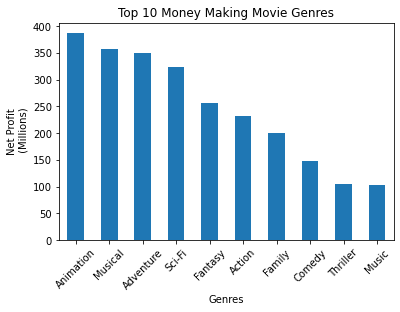

In [57]:
top_10_cat.plot.bar(xlabel = 'Genres',ylabel = 'Net Profit\n (Millions)',title= "Top 10 Money Making Movie Genres",rot = 45);

In [58]:
#single_category_budget_df.plot.bar(x ='genres', y = 'net_cost'.mean())

In [ ]:
#filtered to see all movies with more than $0 global gross
#p_cost_simp_filter = p_cost_simplified[p_cost_simplified['total_gross']>0]
#p_cost_simp_filter.sort_values(by= 'total_gross', ascending = False).head()

In [ ]:
#fig, ax =

In [ ]:
############################################

In [ ]:
#tn_db = tn_mov_df.join(tndb_df, on='id', how = 'left',lsuffix = " combined")
#tn_db.head()


In [ ]:
'''


tndb_df["Mov_name"] = tndb_df['movie'].str.lower().str.replace('[ \'\:\,\.]','').astype(str)
tn_mov_df["Mov_name"] = tn_mov_df['title'].str.lower().str.replace('[ \'\:\,\.]','').astype(str)
akas_df["Mov_name"] = akas_df['title'].str.lower().str.replace('[ \'\:\,\.]','').astype(str)
basics_df['Mov_name'] = basics_df['primary_title'].str.lower().str.replace('[ \'\:\,\.]','').astype(str)
'''


#def simplify_title(df_col):
#    df_col['Mov_name'] = df_col.str.lower().str.replace('[ \'\:\,\.]','').astype(str)
display(akas_df.head(1))
#tn_mov_df.head(1)
basics_df.head(1)

In [ ]:
imdb_db = basics_df.join(akas_df,lsuffix ='title_id',rsuffix = "tconst",how = "outer")
imdb_db

In [ ]:
#display(tndb_df.head(1))
#display(tn_mov_df.head(1))
#akas_df.head(1)

In [ ]:
#tn_db = tn_mov_df.merge(tndb_df, on = 'Mov_name', how = 'left')
#tn_db.head()

In [ ]:
#tn_db.info()

#tn_imdb_db = akas_df.merge(tn_db, on = 'Mov_name', how = 'left')
#tn_imdb_db.info()
#tn_imdb_db.head(10)

In [ ]:
#tn_df['Mov_name'] = tn_df['Mov_name'].str.replace('[ \'\:\,\.]','')

In [ ]:
#tn_info_df = tn_mov_df.join(tndb_df, how = "inner")